In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import warnings

warnings.filterwarnings("ignore")


# TP 7

Os dados são numéricos, o que nos aponta para ser um problema de regressão.

## Ler o ficheiro de dados

### a)

In [2]:
df = pd.read_csv("../../ficheiros/Parte 2/concrete.csv")

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### b)

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'slag'}>,
        <Axes: title={'center': 'ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplastic'}>,
        <Axes: title={'center': 'coarseagg'}>],
       [<Axes: title={'center': 'fineagg'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'strength'}>]], dtype=object)

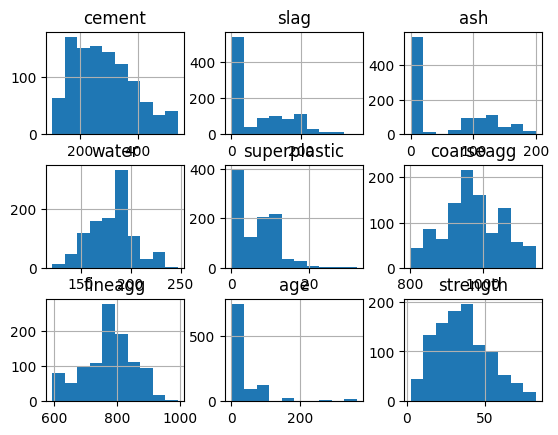

In [8]:
df.hist()

### c)

In [9]:
def normalize(y):
    y_norm = ((y-np.min(y))) / (np.max(y)-np.min(y))
    return y_norm

In [10]:
data_norm = df.apply(normalize)

In [11]:
print(data_norm["strength"].describe())
print(data_norm.describe())

count    1030.000000
mean        0.417191
std         0.208119
min         0.000000
25%         0.266351
50%         0.400087
75%         0.545721
max         1.000000
Name: strength, dtype: float64
            cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean      0.409059     0.205609     0.270806     0.477374      0.192691   
std       0.238599     0.240065     0.319825     0.170561      0.185523   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.206336     0.000000     0.000000     0.344249      0.000000   
50%       0.390183     0.061213     0.000000     0.504792      0.198758   
75%       0.566210     0.397746     0.591204     0.560703      0.316770   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean 

### d)

In [16]:
n_rows = len(data_norm)
index = np.random.choice(n_rows, size=int(0.7 * n_rows)) 

data_train = data_norm.iloc[index]
data_test = data_norm.drop(index)

x_train = data_train.drop("strength", axis=1)
x_test = data_train["strength"]

y_train = data_test.drop("strength", axis=1)
y_test = data_test["strength"]


### e)

In [17]:
Nhidden = 1
nn = MLPRegressor(hidden_layer_sizes=Nhidden, activation="tanh", solver="lbfgs", max_iter=1000, learning_rate_init=0.001)

# ver: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [18]:
from sklearn.metrics import mean_squared_error

nn.fit(x_train, y_train)

# Make prediction
pred = nn.predict(x_test)

# Calcular accuracy e erros de métrica
test_set_rsquared = nn.score(x_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("R_squared value: ", test_set_rsquared)
print("RMSE: ", test_set_rmse)

ValueError: Found input variables with inconsistent numbers of samples: [721, 514]

### f)